# Email Marketing Campaign


## Goal

Optimizing marketing campaigns is one of the most common data science tasks. Among the many marketing tools available, emails stand out as particularly efficient.
Emails are great because they are free, scalable, and can be easily personalized. Email optimization involves personalizing the content and/or the subject line, selecting the recipients, and determining the timing of the sends, among other factors. Machine Learning excels at this.

## Case Description

The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past.

They have chosen a random sample of users and emailed them. The email lets the user know about a new feature implemented on the site. From the marketing team perspective, success is if the user clicks on the link inside of the email. This link takes the user to the company site.


You are in charge of figuring out how the email campaign performed and were asked the following questions:

- What percentage of users opened the email and what percentage clicked on the link within the email?

- The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?

- By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?

- Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.




# Data
We have 3 tables in this case study.Available here
The 3 tables are:


## email_table 
- info about each email that was sent

## Columns:
- email_id : the Id of the email that was sent. It is unique by email.
- email_text : there are two versions of the email: one has “long text” (i.e. has 4 paragraphs) and one has “short text” (just two paragraphs)
has 4 paragraphs) and one has “short text” (just two paragraphs)
- email_version : some emails were “personalized” (i.e. they had the name of the user receiving the email in the incipit, such as “Hi John”), while some emails were “generic” (the incipit was just “Hi,”).
- hour : the local time on which the email was sent.
- weekday : the day on which the email was sent.
- user_country : the country where the user receiving the email was based. It comes from the user ip address when she created the account.
- user_past_purchases : how many items in the past were bought by the user receiving the email


# email_opened_table 

- the id of the emails that were opened at least once.
  
Columns:
- email_id : the id of the emails that were opened, i.e. the user clicked on the email and, supposedly, read it.

# link_clicked_table 
- the id of the emails whose link inside was clicked at least once.
 
Columns:

- email_id : if the user clicked on the link within the email, then the id of the email shows up on this table.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('email_table.csv')
df.head(5)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [3]:
email_opened = pd.read_csv('email_opened_table.csv')
email_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [4]:
email_opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [5]:
link = pd.read_csv('link_clicked_table.csv')
link.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [6]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [8]:
df['email_text'].value_counts()

email_text
long_email     50276
short_email    49724
Name: count, dtype: int64

In [9]:
df['email_version'].value_counts()

email_version
generic         50209
personalized    49791
Name: count, dtype: int64

In [10]:
df['hour'].value_counts()

hour
9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: count, dtype: int64

In [11]:
df['weekday'].value_counts()

weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64

In [12]:
df['user_country'].value_counts()

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64

In [13]:
df['user_past_purchases'].value_counts()

user_past_purchases
0     13877
1     13751
2     13036
3     12077
4     10743
5      9042
6      7518
7      6051
8      4393
9      3296
10     2363
11     1553
12      944
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
Name: count, dtype: int64

# EDA 

In [14]:
click_val = link['email_id'].values

def clicks(x):
    if x in click_val:
        return 1
    else:
        return 0

## setting the target variable

In [15]:
df['opened'] = df['email_id'].isin(email_opened['email_id']).astype(int)

In [16]:
df['clicked'] = df['email_id'].isin(link['email_id']).astype(int)

In [17]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


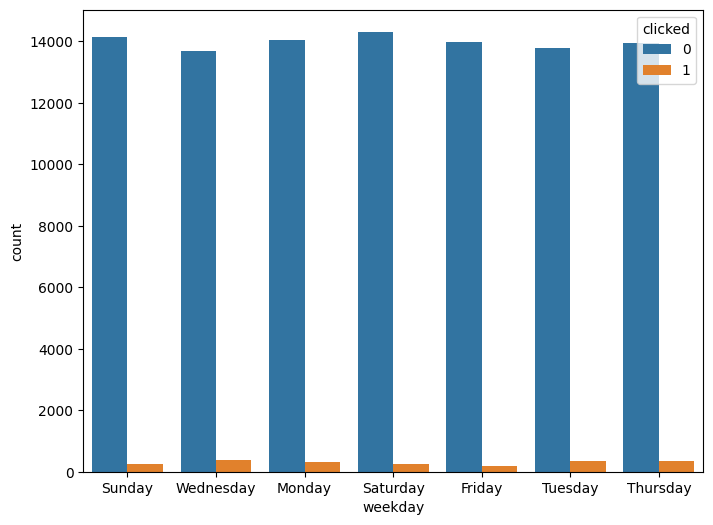

In [18]:
plt.figure(figsize=(8,6))

sns.countplot(x='weekday', hue='clicked',data=df)
plt.show()

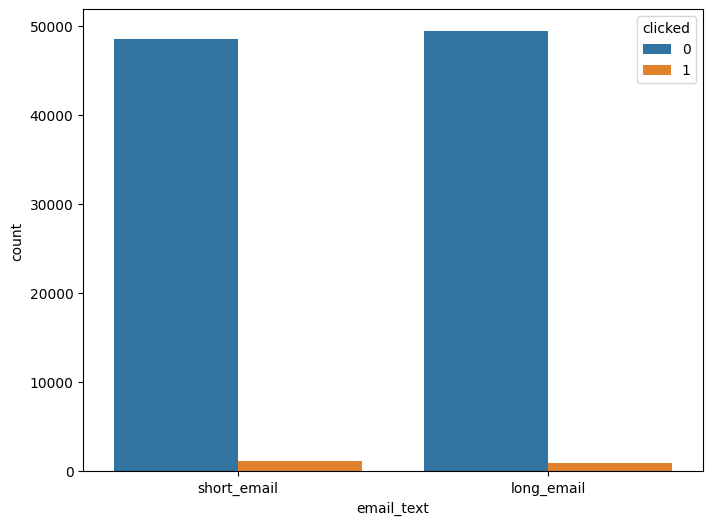

In [19]:
plt.figure(figsize=(8,6))

sns.countplot(x='email_text', hue='clicked',data=df)
plt.show()

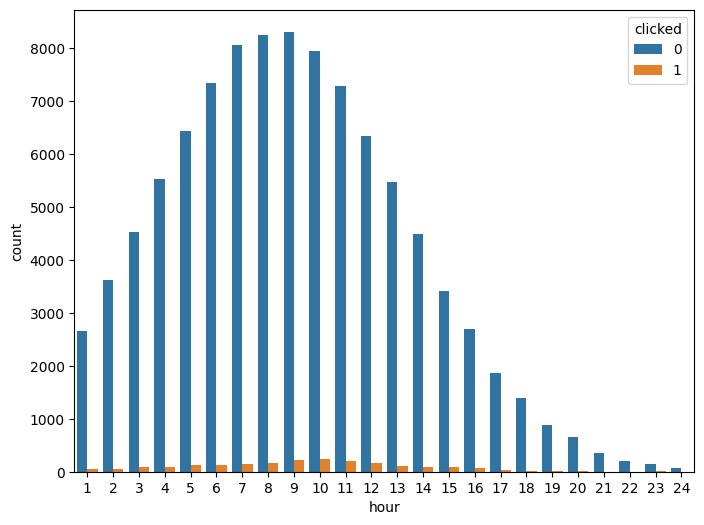

In [20]:
plt.figure(figsize=(8,6))

sns.countplot(x='hour', hue='clicked',data=df)
plt.show()

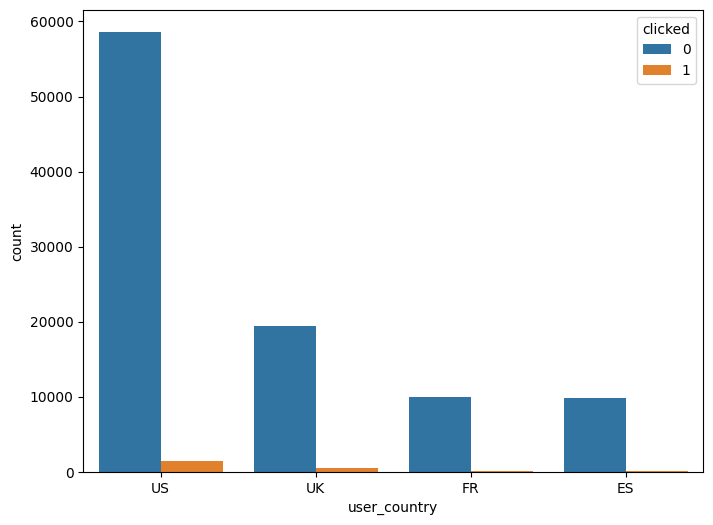

In [21]:
plt.figure(figsize=(8,6))

sns.countplot(x='user_country', hue='clicked',data=df)
plt.show()

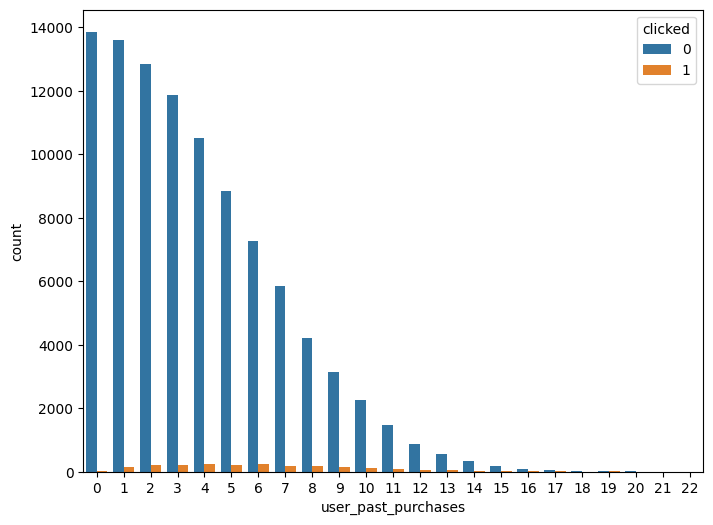

In [22]:
plt.figure(figsize=(8,6))

sns.countplot(x='user_past_purchases', hue='clicked',data=df)
plt.show()

## converting categorical to numerical

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Label Encoding for binary categories
le = LabelEncoder()

df_encoded['email_text'] = le.fit_transform(df_encoded['email_text'])         # short_email = 0, long_email = 1
df_encoded['email_version'] = le.fit_transform(df_encoded['email_version']) # generic = 0, personalized = 1

#df_encoded['weekday'] = le.fit_transform(df_encoded['weekday'])
#df_encoded['user_country'] = le.fit_transform(df_encoded['user_country'])



# One-Hot Encoding for non-binary categories
df_encoded = pd.get_dummies(df_encoded, columns=['weekday', 'user_country'], drop_first=True)

df_encoded = df_encoded.astype(int)


# Feature columns (all except email_id, opened, clicked)
feature_cols = [col for col in df_encoded.columns if col not in ['email_id', 'opened', 'clicked']]


In [24]:
df_encoded.head()

,email_id,email_text,email_version,hour,user_past_purchases,opened,clicked,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,1,1,2,5,0,0,0,0,1,0,0,0,0,0,1
1,966622,0,1,12,2,1,1,0,0,1,0,0,0,0,1,0
2,777221,0,1,11,2,0,0,0,0,0,0,0,1,0,0,1
3,493711,1,0,6,1,0,0,1,0,0,0,0,0,0,1,0
4,106887,0,0,14,6,0,0,1,0,0,0,0,0,0,0,1


In [25]:
df_encoded.to_csv('cleaned_data.csv', index=False)

In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   email_id             100000 non-null  int64
 1   email_text           100000 non-null  int64
 2   email_version        100000 non-null  int64
 3   hour                 100000 non-null  int64
 4   user_past_purchases  100000 non-null  int64
 5   opened               100000 non-null  int64
 6   clicked              100000 non-null  int64
 7   weekday_Monday       100000 non-null  int64
 8   weekday_Saturday     100000 non-null  int64
 9   weekday_Sunday       100000 non-null  int64
 10  weekday_Thursday     100000 non-null  int64
 11  weekday_Tuesday      100000 non-null  int64
 12  weekday_Wednesday    100000 non-null  int64
 13  user_country_FR      100000 non-null  int64
 14  user_country_UK      100000 non-null  int64
 15  user_country_US      100000 non-null  int64
dtypes: 

In [27]:
df_encoded.corr()

,email_id,email_text,email_version,hour,user_past_purchases,opened,clicked,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
email_id,1.000000,0.001249,-0.000241,-0.003563,0.002099,0.000443,-0.001198,0.001956,-0.004713,-0.002021,-0.001334,0.004823,0.002190,0.000045,-0.001023,0.000700
email_text,0.001249,1.000000,-0.000283,-0.001611,-0.003217,0.040523,0.018519,-0.002900,-0.001434,-0.002211,0.004397,0.001351,-0.001617,0.000606,-0.001675,-0.000352
email_version,-0.000241,-0.000283,1.000000,-0.000827,-0.001914,0.079471,0.042208,0.001968,-0.006692,0.007327,-0.000438,0.004078,-0.000032,-0.000974,0.002261,-0.002364
hour,-0.003563,-0.001611,-0.000827,1.000000,0.002986,0.025972,0.011047,-0.000326,0.003186,0.003920,-0.004266,-0.001750,0.000743,-0.002363,-0.001930,0.002296
user_past_purchases,0.002099,-0.003217,-0.001914,0.002986,1.000000,0.085934,0.105445,0.002996,0.001382,-0.006180,-0.003082,0.007193,-0.004210,0.004537,-0.005430,-0.002140
opened,0.000443,0.040523,0.079471,0.025972,0.085934,1.000000,0.421750,0.016960,-0.021422,-0.021270,0.020090,0.022701,0.022372,-0.068750,0.027393,0.062746
clicked,-0.001198,0.018519,0.042208,0.011047,0.105445,0.421750,1.000000,0.004880,-0.009588,-0.012635,0.009223,0.010423,0.018077,-0.030511,0.012077,0.027012
weekday_Monday,0.001956,-0.002900,0.001968,-0.000326,0.002996,0.016960,0.004880,1.000000,-0.169122,-0.167883,-0.167133,-0.166217,-0.165813,-0.003383,0.000012,-0.000234
weekday_Saturday,-0.004713,-0.001434,-0.006692,0.003186,0.001382,-0.021422,-0.009588,-0.169122,1.000000,-0.169287,-0.168530,-0.167606,-0.167199,0.001590,0.002276,-0.004331
weekday_Sunday,-0.002021,-0.002211,0.007327,0.003920,-0.006180,-0.021270,-0.012635,-0.167883,-0.169287,1.000000,-0.167296,-0.166379,-0.165974,-0.001233,-0.000758,0.002127


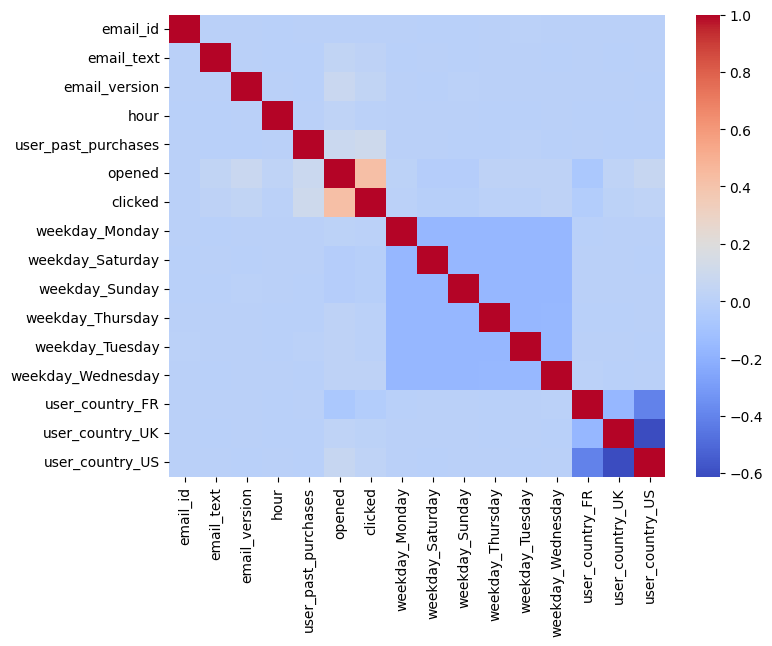

In [29]:
plt.figure(figsize=(8,6))

sns.heatmap(data=df_encoded.corr(),cmap='coolwarm')
plt.show()

In [39]:
df = df_encoded

In [40]:
## upsampling
df_minority=df[df['clicked']==1]
df_majority=df[df['clicked']==0]

In [41]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [42]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [43]:
df = df_upsampled

In [44]:
df.head()

,email_id,email_text,email_version,hour,user_past_purchases,opened,clicked,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,1,1,2,5,0,0,0,0,1,0,0,0,0,0,1
2,777221,0,1,11,2,0,0,0,0,0,0,0,1,0,0,1
3,493711,1,0,6,1,0,0,1,0,0,0,0,0,0,1,0
4,106887,0,0,14,6,0,0,1,0,0,0,0,0,0,0,1
5,684440,0,1,6,3,0,0,0,0,1,0,0,0,0,1,0


In [45]:
df['clicked'].value_counts()

clicked
0    97881
1    97881
Name: count, dtype: int64

# Train test split

In [46]:
# Feature columns (all except email_id, opened, clicked)
feature_cols = [col for col in df.columns if col not in ['email_id', 'opened', 'clicked']]

In [47]:
feature_cols

['email_text',
 'email_version',
 'hour',
 'user_past_purchases',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'user_country_FR',
 'user_country_UK',
 'user_country_US']

In [49]:
X = df[feature_cols]
y = df['clicked']

In [50]:
X.shape, y.shape

((195762, 13), (195762,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape,y_train.shape

((156609, 13), (156609,))

In [53]:
X_test.shape, y_test.shape

((39153, 13), (39153,))

## Data Scaling

# Modelling  - Sequential

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [55]:
model = Sequential()

model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
## Set up the early stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [62]:
## Train the model
history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
    callbacks=[early_stopping_callback]
    )

Epoch 1/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6904 - loss: 0.5584 - val_accuracy: 0.6936 - val_loss: 0.5616
Epoch 2/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6908 - loss: 0.5584 - val_accuracy: 0.6938 - val_loss: 0.5550
Epoch 3/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6900 - loss: 0.5583 - val_accuracy: 0.6967 - val_loss: 0.5536
Epoch 4/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6905 - loss: 0.5583 - val_accuracy: 0.6932 - val_loss: 0.5575
Epoch 5/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6898 - loss: 0.5582 - val_accuracy: 0.6953 - val_loss: 0.5537
Epoch 6/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6910 - loss: 0.5574 - val_accuracy: 0.6917 - val_loss: 0.5544
Epoch 7/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6881 - loss: 0.5580 - val_accuracy: 0.6948 - val_loss: 0.5543
Epoch 8/100
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6914 - l

1224/1224 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[11887  7671]
 [ 4245 15350]]


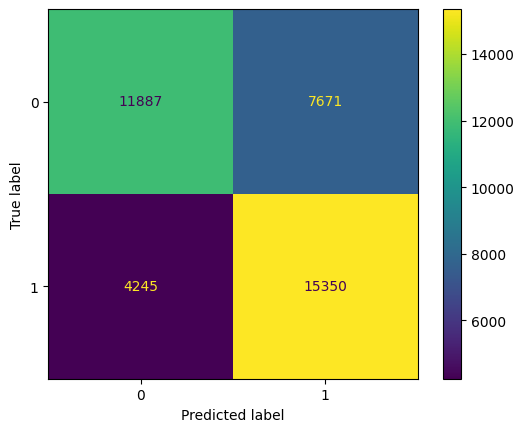

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ypred = model.predict(X_test) > 0.5

cm = confusion_matrix(y_test,ypred)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     19558
           1       0.67      0.78      0.72     19595

    accuracy                           0.70     39153
   macro avg       0.70      0.70      0.69     39153
weighted avg       0.70      0.70      0.69     39153



In [66]:
from sklearn.metrics import roc_auc_score
ypred_proba = model.predict(X_train)

print('ROC : ', roc_auc_score(y_test, ypred))

4895/4895 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
ROC :  0.6955725423150426


1224/1224 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[11887  7671]
 [ 4245 15350]]


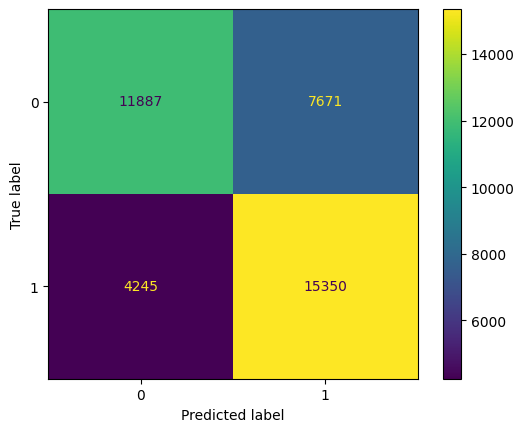

In [67]:

ypred = model.predict(X_test) > 0.5

cm = confusion_matrix(y_test,ypred)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [69]:
from sklearn.metrics import roc_auc_score
ypred_proba = model.predict(X_train)

print('ROC : ', roc_auc_score(y_test, ypred))

4895/4895 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
ROC :  0.6955725423150426
